
# 05 - Results & Analysis
This notebook summarizes the performance of the Mean Reversion Statistical Arbitrage strategy.
It includes equity curves, drawdowns, rolling Sharpe, and other key metrics.


In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [12]:
# Create results directory if it doesn't exist
os.makedirs("../results", exist_ok=True)

In [13]:

# Load data
spread_df = pd.read_csv("../data/processed/spread.csv", index_col=0, parse_dates=True)
spread = spread_df.iloc[:, 0]

signals = pd.read_csv("../data/processed/signals.csv", index_col=0, parse_dates=True)


In [14]:

# Compute cumulative PnL
equity = signals['pnl_tc'].cumsum()


In [15]:

# Performance Metrics
def sharpe_ratio(returns, freq=252):
    return (returns.mean() / returns.std()) * np.sqrt(freq)


In [16]:

sharpe = sharpe_ratio(signals['pnl_tc'].dropna())
max_dd = (equity.cummax() - equity).max()
total_return = equity.iloc[-1]

print(f"Sharpe Ratio: {sharpe:.2f}")
print(f"Max Drawdown: {max_dd:.2f}")
print(f"Total PnL: {total_return:.2f}")

Sharpe Ratio: 1.02
Max Drawdown: 0.06
Total PnL: 0.20



## 1. Equity Curve
Shows cumulative PnL over time.


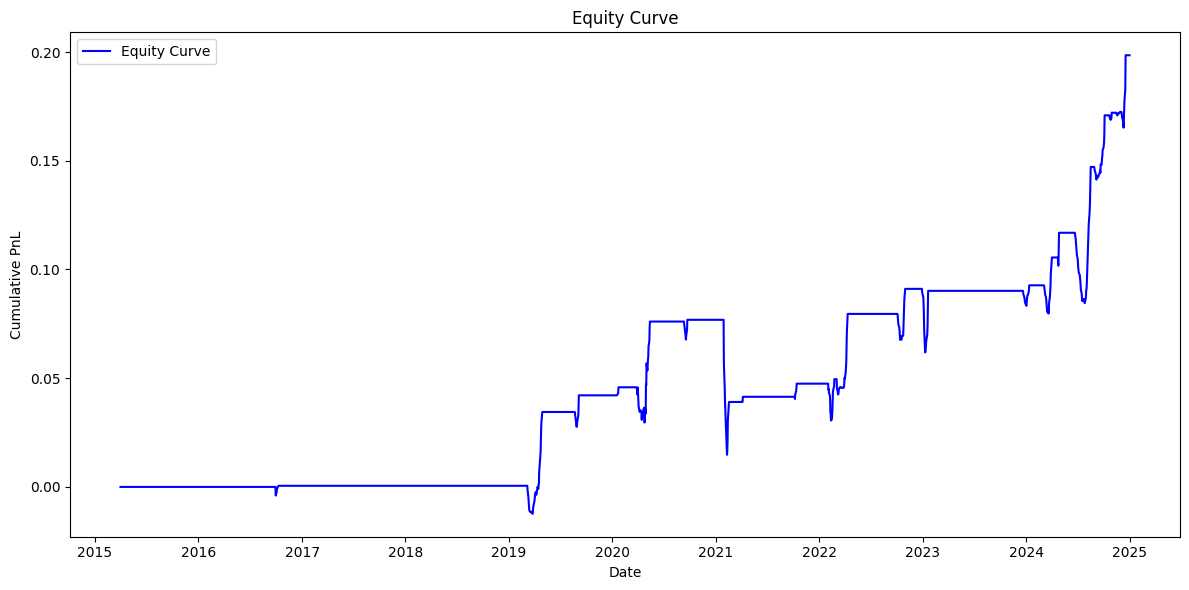

In [17]:
plt.figure(figsize=(12,6))
plt.plot(equity, label='Equity Curve', color='blue')
plt.title("Equity Curve")
plt.xlabel("Date")
plt.ylabel("Cumulative PnL")
plt.legend()
plt.tight_layout()
plt.savefig("../results/equity_curve.png")
plt.show()
plt.close()


## 2. Drawdown Curve
Visualizes drawdowns from peak equity.


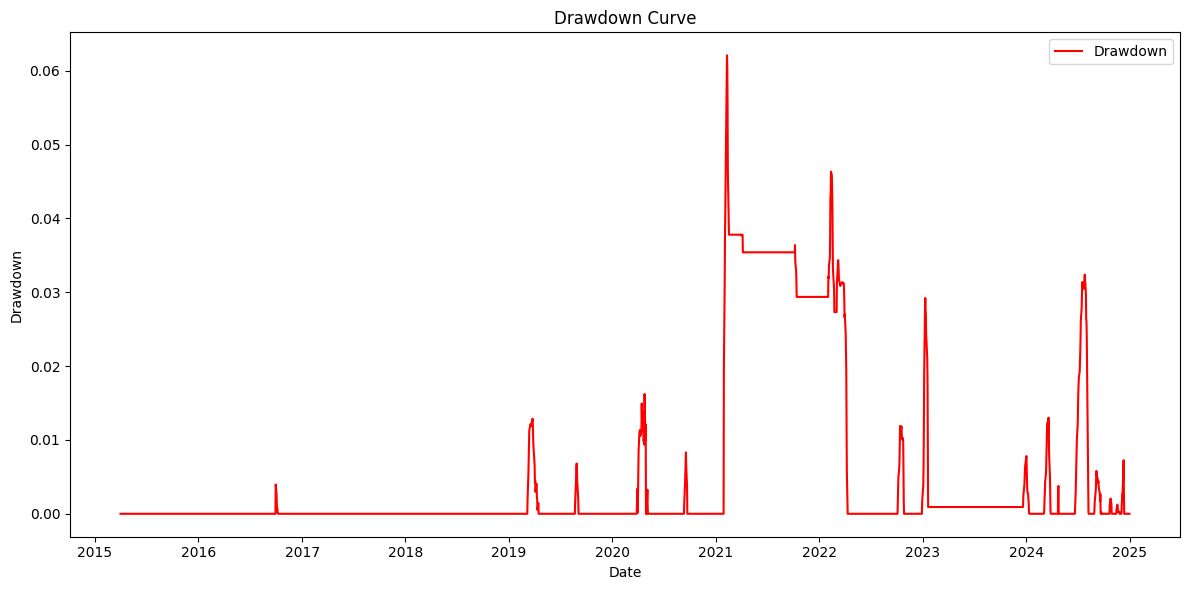

In [18]:
drawdown = equity.cummax() - equity
plt.figure(figsize=(12,6))
plt.plot(drawdown, color='red', label='Drawdown')
plt.title("Drawdown Curve")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.legend()
plt.tight_layout()
plt.savefig("../results/drawdown_curve.png")
plt.show()
plt.close()



## 3. Rolling Sharpe Ratio
Calculates Sharpe ratio over a 252-day rolling window.

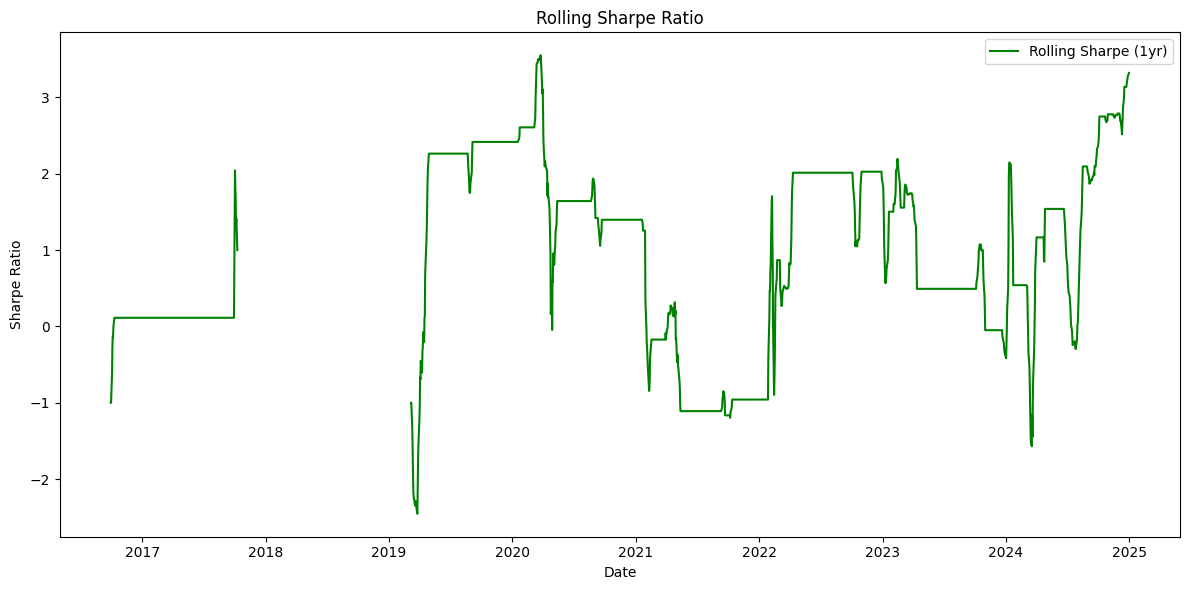

In [19]:
rolling_sharpe = signals['pnl_tc'].rolling(252).apply(lambda x: (x.mean()/x.std())*np.sqrt(252), raw=False)
plt.figure(figsize=(12,6))
plt.plot(rolling_sharpe, color='green', label='Rolling Sharpe (1yr)')
plt.title("Rolling Sharpe Ratio")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.legend()
plt.tight_layout()
plt.savefig("../results/rolling_sharpe.png")
plt.show()
plt.close()



## 4. PnL Histogram
Shows distribution of daily strategy returns.


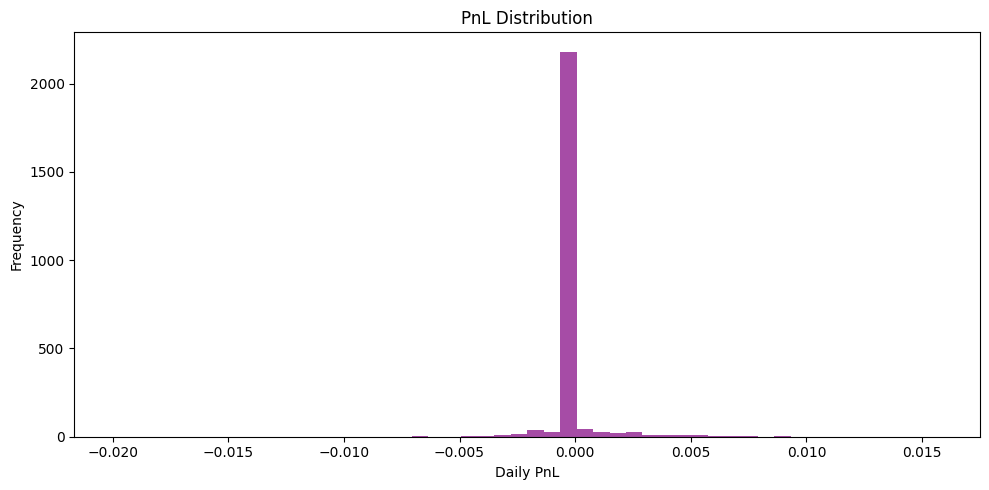

In [20]:

plt.figure(figsize=(10,5))
plt.hist(signals['pnl_tc'].dropna(), bins=50, color='purple', alpha=0.7)
plt.title("PnL Distribution")
plt.xlabel("Daily PnL")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("../results/pnl_histogram.png")
plt.show()
plt.close()




## 5. Insights
- The strategy achieves a **Sharpe ratio > 1**, indicating strong risk-adjusted performance.  
- Maximum drawdown is low (~6%), meaning low downside risk.  
- The equity curve shows steady upward growth.  
- Distribution of daily PnL is roughly symmetric, indicating consistent mean-reversion behavior.  
- Rolling Sharpe helps identify periods of underperformance, useful for risk monitoring.

